<a href="https://colab.research.google.com/github/itsmimahi/Zomato-customer-segmentation/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

## IMPORTING

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing all important liabraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid',{'grid.linestyle': '--'})

# set the display figure size using rcparams method.
sns.set(rc = {'figure.figsize': (10,6)})
plt.rcParams['figure.figsize'] = [10,6]

# importing datasets.
meta_df = pd.read_csv('/content/drive/MyDrive/Unsupervised ML Capstone Project 4/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Unsupervised ML Capstone Project 4/Zomato Restaurant reviews.csv')

## Dataset Inspection.


### Meta dataset

In [ ]:
# lets see the overview of meta dataset.
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
# No of rows and columns in meta dataset.
meta_df.shape

(105, 6)

In [ ]:
# Information about meta dataset.
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
# Descriptive info about dataset.
meta_df.describe().transpose()

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [ ]:
# Checking for duplicate values.
print(len(meta_df.drop_duplicates()))
print(len(meta_df['Name'].drop_duplicates()))

105
105


In [ ]:
meta_df['Cost'].value_counts()

500      13
600      10
700       8
1,200     7
400       6
1,000     6
200       5
800       5
1,500     5
1,300     4
350       3
1,600     3
750       3
550       3
900       3
1,100     3
1,700     2
150       2
1,400     2
450       2
1,900     2
300       1
2,500     1
850       1
650       1
1,800     1
2,800     1
1,750     1
250       1
Name: Cost, dtype: int64

In [ ]:
# Changing the data type of cost colummn object to int.
meta_df['Cost']= meta_df['Cost'].str.replace(',','').astype('int64')

## Reviews

In [ ]:
# overview of reviews dataset.
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
# No of rows and columns in reviews dataset.
reviews_df.shape

(10000, 7)

In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
# Looking for null values.
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [ ]:
reviews_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

Observation : In the Rating column there is value which is Like which should not be there.

In [ ]:
# Removing like value and replace it with mean value.
reviews_df.loc[reviews_df['Rating'] == 'Like'] = np.nan
reviews_df['Rating'] = reviews_df['Rating'].astype('float64')
print(np.mean(reviews_df['Rating']))

3.601044071880333


In [ ]:
# Since the mean is 3.6 so we will round it off by 3.5.
reviews_df['Rating'].fillna(3.5, inplace = True)

In [ ]:
reviews_df['Rating'].value_counts()

5.0    3832
4.0    2373
1.0    1735
3.0    1193
2.0     684
3.5      86
4.5      69
2.5      19
1.5       9
Name: Rating, dtype: int64

In [ ]:
# feature engineering on the dataset.
reviews_df['Reviews'],reviews_df['Followers'] = reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'])
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour
reviews_df = reviews_df.drop(['Metadata'], axis= 1)


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  9999 non-null   object        
 1   Reviewer    9961 non-null   object        
 2   Review      9954 non-null   object        
 3   Rating      10000 non-null  float64       
 4   Time        9961 non-null   datetime64[ns]
 5   Pictures    9999 non-null   float64       
 6   Reviews     9961 non-null   float64       
 7   Followers   8383 non-null   float64       
 8   Year        9961 non-null   float64       
 9   Month       9961 non-null   float64       
 10  Hour        9961 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 859.5+ KB


In [ ]:
# Checking for null values.
reviews_df.isna().sum()

Restaurant       1
Reviewer        39
Review          46
Rating           0
Time            39
Pictures         1
Reviews         39
Followers     1617
Year            39
Month           39
Hour            39
dtype: int64

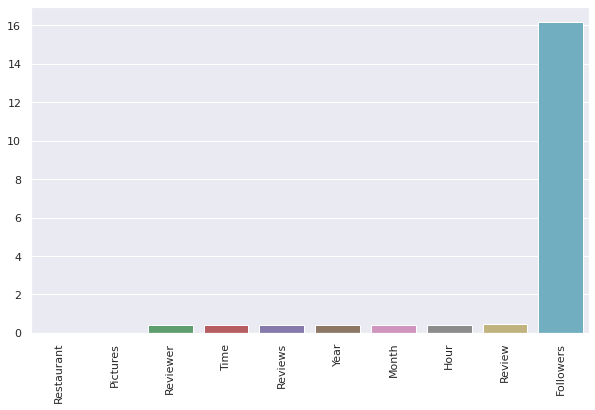

In [ ]:
# Creating function to find the percentage of null values.
def percentage_missing(df):
  percent_nan = 100 * df.isnull().sum()/len(df)
  percent_nan = percent_nan[percent_nan > 0].sort_values()
  return percent_nan

percent_nan = percentage_missing(reviews_df)

# Visualizing the null values.
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);

Followers column has the highest number of null values.

(0.0, 1.0)

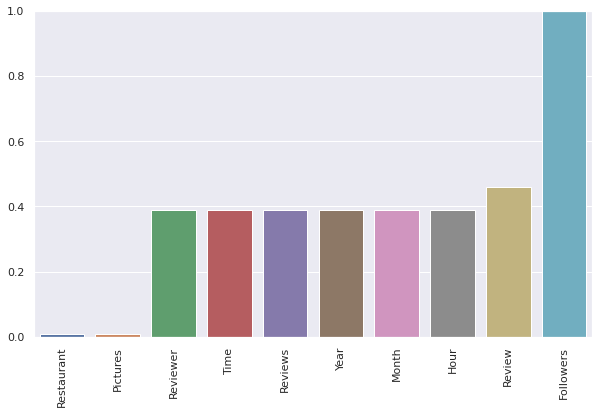

In [ ]:
# Checking for the missing values in columns less than 1%.
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)

# set 1% threshold.
plt.ylim(0,1)

In [ ]:
percent_nan[percent_nan < 1]

Restaurant    0.01
Pictures      0.01
Reviewer      0.39
Time          0.39
Reviews       0.39
Year          0.39
Month         0.39
Hour          0.39
Review        0.46
dtype: float64

Since the most of columns have missing value percentage is 39%, so it is quit possible that same row of each column has missing value.

In [ ]:
# Checking the null value observation in restaurant feature.
reviews_df[reviews_df['Restaurant'].isnull()]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
7601,NaN,NaN,NaN,3.5,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking null value observvation in picture feature.
reviews_df[reviews_df['Pictures'].isna()]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
7601,NaN,NaN,NaN,3.5,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking null values observation in reviewer feature.
reviews_df[reviews_df['Reviewer'].isnull()]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
7601,NaN,NaN,NaN,3.5,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8777,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8778,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8779,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8780,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8781,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8782,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8783,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8784,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8785,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking null value observvation follower feature.
reviews_df[reviews_df['Followers'].isnull()]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5.0,2019-05-24 15:22:00,0.0,1.0,NaN,2019.0,5.0,15.0
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5.0,2019-05-24 01:02:00,0.0,1.0,NaN,2019.0,5.0,1.0
7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4.0,2019-05-23 15:01:00,0.0,1.0,NaN,2019.0,5.0,15.0
14,Beyond Flavours,Kankaria.ritu,"We ordered corn cheese balls, manchow soup and...",1.0,2019-05-22 21:19:00,0.0,1.0,NaN,2019.0,5.0,21.0
24,Beyond Flavours,Amritap Datta,"Excellent experience, mouthwatering food, good...",5.0,2019-05-20 23:33:00,0.0,1.0,NaN,2019.0,5.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...
9912,Chinese Pavilion,Anil Rao,The tofu with mushrooms was absolutely wonderf...,5.0,2019-04-04 02:15:00,0.0,9.0,NaN,2019.0,4.0,2.0
9918,Chinese Pavilion,Ajay Munjal,The food is delicious. Service is excellent. I...,5.0,2019-02-16 13:56:00,0.0,4.0,NaN,2019.0,2.0,13.0
9933,Chinese Pavilion,Korak Mukherjee,I was here last night with 2 of my friends. We...,1.0,2018-05-29 16:02:00,1.0,9.0,NaN,2018.0,5.0,16.0
9940,Chinese Pavilion,Anubinda Dash,The food was amazing. Do not forget to try 'Mo...,4.5,2018-03-02 19:54:00,10.0,11.0,NaN,2018.0,3.0,19.0


In [ ]:
# Filling null values in follower feature with 0.
reviews_df['Followers'].fillna(0, inplace = True)

# Since all same rows of all column has missing data so we can drop this rows.
reviews_df.dropna(inplace=True)

# Checking null values in dataset.
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Hour          0
dtype: int64

# EDA

## METADATA

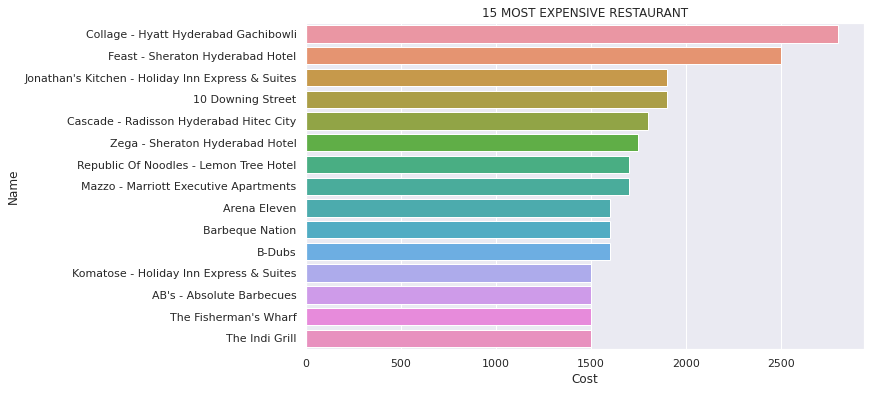

In [ ]:
# Looking for most expensive restaurant.
sns.barplot(x = 'Cost', y = 'Name', data = meta_df, order = meta_df.sort_values('Cost',ascending=False).Name[:15])
plt.title('15 MOST EXPENSIVE RESTAURANT')
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

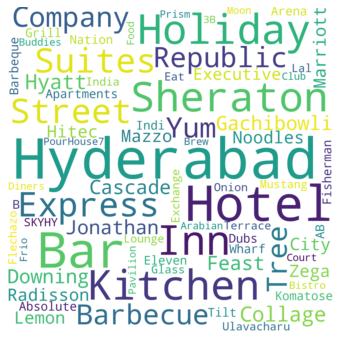

In [ ]:
# Creating text variable.
text = ' '.join(name for name in meta_df.sort_values('Cost', ascending=False).Name[:30])

# Creating word cloud with text argument by using .generate() method.
word_cloud = WordCloud(width = 1400, height = 1400, collocations = False, background_color = 'White').generate(text)

# Display the generated cloud.
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')

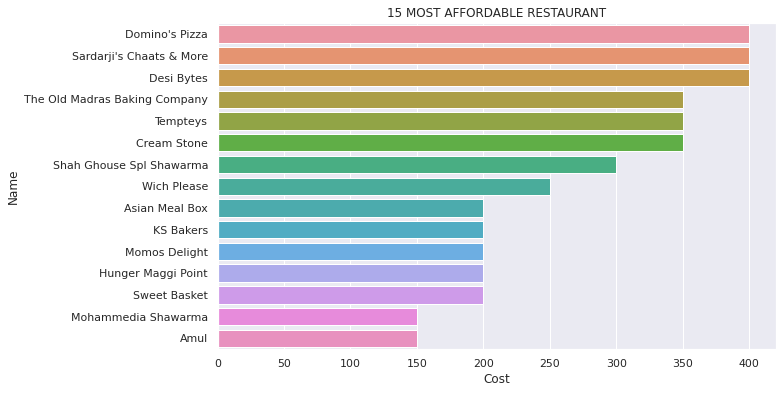

In [ ]:
# Checking for the most affordable restaurants.
sns.barplot(x = 'Cost', y = 'Name', data = meta_df, order = meta_df.sort_values('Cost',ascending = False).Name[-15:])
plt.title('15 MOST AFFORDABLE RESTAURANT')
plt.show()

(-0.5, 1499.5, 1499.5, -0.5)

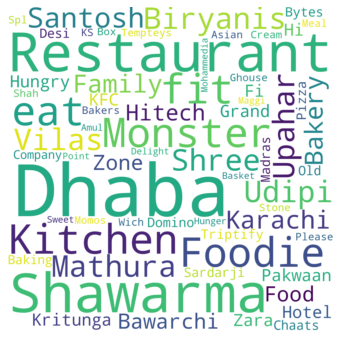

In [ ]:
# Creating text variable.
text = ' '.join(name for name in meta_df.sort_values('Cost',ascending = False).Name[-30:])

# Creating word cloud with text argument by using .generate() method.
word_cloud = WordCloud(width = 1500, height = 1500, background_color = 'White', collocations = False).generate(text)

# Display the generated word cloud.
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')

In [ ]:
# Lets find the most offered cusines by restaurants.
meta_df.Cuisines

0      Chinese, Continental, Kebab, European, South I...
1                         Biryani, North Indian, Chinese
2           Asian, Mediterranean, North Indian, Desserts
3      Biryani, North Indian, Chinese, Seafood, Bever...
4      Asian, Continental, North Indian, Chinese, Med...
                             ...                        
100                                     Fast Food, Salad
101                                       Bakery, Mithai
102                       North Indian, Biryani, Chinese
103                                            Fast Food
104                      Thai, Asian, Chinese, Malaysian
Name: Cuisines, Length: 105, dtype: object

In [ ]:
# Making list of cuisines.
cuisines_list = meta_df.Cuisines.str.split(',')
cuisines_list

0      [Chinese,  Continental,  Kebab,  European,  So...
1                     [Biryani,  North Indian,  Chinese]
2      [Asian,  Mediterranean,  North Indian,  Desserts]
3      [Biryani,  North Indian,  Chinese,  Seafood,  ...
4      [Asian,  Continental,  North Indian,  Chinese,...
                             ...                        
100                                  [Fast Food,  Salad]
101                                    [Bakery,  Mithai]
102                   [North Indian,  Biryani,  Chinese]
103                                          [Fast Food]
104                 [Thai,  Asian,  Chinese,  Malaysian]
Name: Cuisines, Length: 105, dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

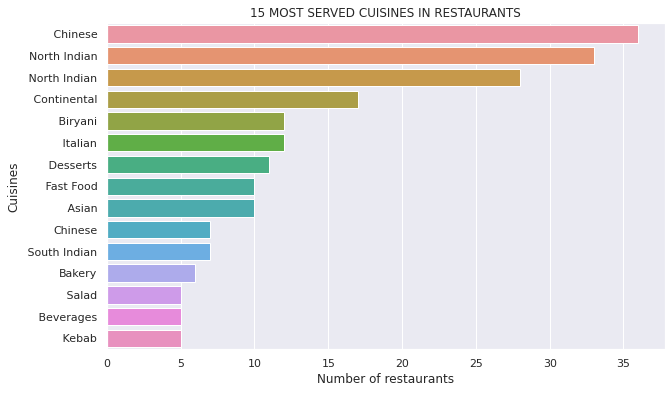

In [ ]:
# Storing all cuisines in dict.
cuisines_dict = {}
for names in cuisines_list:
  for name in names:
    if (name in cuisines_dict):
     cuisines_dict[name]+= 1
    else:
      cuisines_dict[name] = 1

# converting dict to Dataframe.
cuisines_df = pd.DataFrame.from_dict([cuisines_dict]).transpose().reset_index().rename(columns = {'index':'Cuisines',0:'Number of restaurants'})

# Visualization of garph most restaurant served.
sns.barplot(x ='Number of restaurants',
            y = 'Cuisines',
            data = cuisines_df,
            order = cuisines_df.sort_values('Number of restaurants', ascending = False).Cuisines[:15])
plt.title('15 MOST SERVED CUISINES IN RESTAURANTS')
plt.show

In [ ]:
cuisines_list

0      [Chinese,  Continental,  Kebab,  European,  So...
1                     [Biryani,  North Indian,  Chinese]
2      [Asian,  Mediterranean,  North Indian,  Desserts]
3      [Biryani,  North Indian,  Chinese,  Seafood,  ...
4      [Asian,  Continental,  North Indian,  Chinese,...
                             ...                        
100                                  [Fast Food,  Salad]
101                                    [Bakery,  Mithai]
102                   [North Indian,  Biryani,  Chinese]
103                                          [Fast Food]
104                 [Thai,  Asian,  Chinese,  Malaysian]
Name: Cuisines, Length: 105, dtype: object

(-0.5, 1399.5, 1399.5, -0.5)

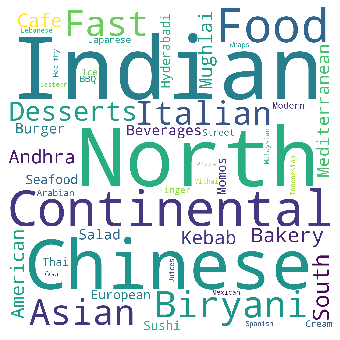

In [ ]:
# Creating word cloud of cuisines.
text = " ".join(name for name in meta_df.Cuisines)
word_cloud = WordCloud(width = 1400, height = 1400, collocations = False, background_color = 'white').generate(text)
# Display genreated  word cloud.
plt.imshow(word_cloud, interpolation = 'none')
plt.axis('off')

In [ ]:
# Storing collections in list.
collection_list = meta_df.Collections.dropna().str.split(',')
collection_list

0      [Food Hygiene Rated Restaurants in Hyderabad, ...
1                                  [Hyderabad's Hottest]
2                  [Great Buffets,  Hyderabad's Hottest]
3                               [Late Night Restaurants]
4      [Best Bars & Pubs,  Food Hygiene Rated Restaur...
5      [Sunday Brunches,  Corporate Favorites,  Great...
6          [Food Hygiene Rated Restaurants in Hyderabad]
8      [Great Buffets,  Live Sports Screenings,  Best...
9                                      [Frozen Delights]
10     [Street Food,  Veggie Friendly,  Pocket Friendly]
11                                    [Barbecue & Grill]
12                                       [Great Buffets]
13     [Corporate Favorites,  Happy Hours,  Live Spor...
14     [Barbecue & Grill,  Great Buffets,  Corporate ...
18                                  [Trending This Week]
19                                  [Trending This Week]
20                                     [Veggie Friendly]
21                     [Great I

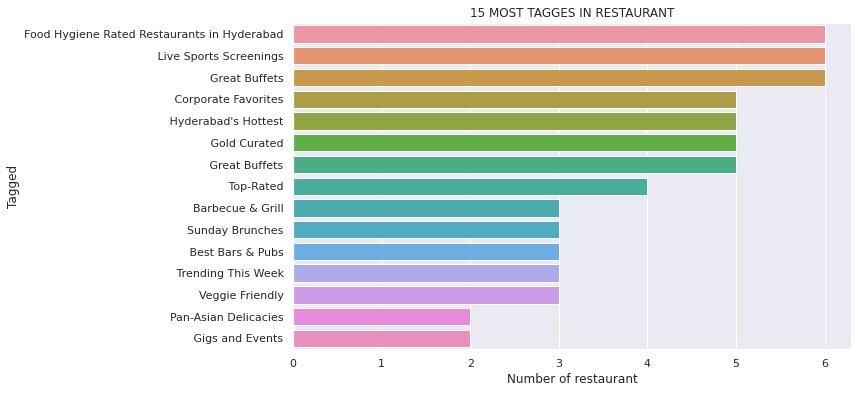

In [ ]:
# Storing all the collections in a dict.
collection_dict = {}
for names in collection_list:
  for name in names:
    if (name in collection_dict):
     collection_dict[name] += 1
    else:
      collection_dict[name] = 1

# Converting colllections dict to Dataframe.
collection_df = pd.DataFrame.from_dict([collection_dict]).transpose().reset_index().rename(columns = {'index':'Tagged',0:'Number of restaurant'})

# Visualizing the most used tagged in restaurant.
sns.barplot(x = 'Number of restaurant',
            y = 'Tagged',
            data = collection_df,
            order = collection_df.sort_values('Number of restaurant', ascending = False).Tagged[:15])
plt.title('15 MOST TAGGES IN RESTAURANT')
plt.show()

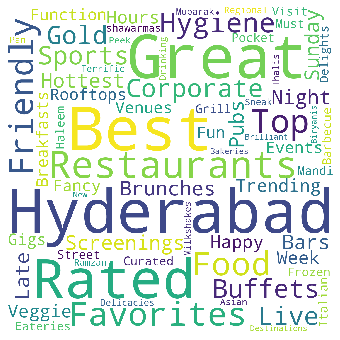

In [ ]:
# Creating the text variable.
text = " ".join(name for name in collection_df.Tagged)

# Creating wordcloud by using .generate() method
word_cloud = WordCloud(width = 1500, height= 1500, collocations= False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation = 'none')
plt.axis('off')
plt.show()


## Reviews

In [ ]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0


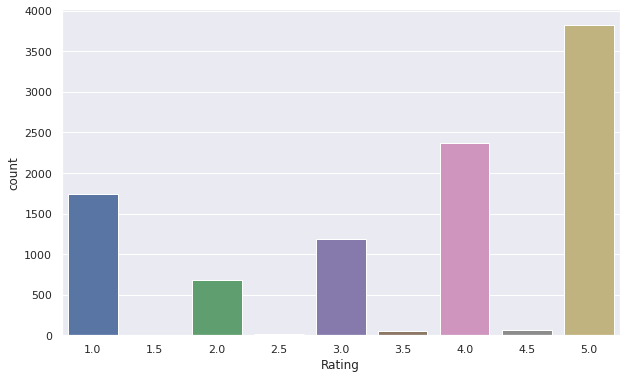

In [ ]:
sns.countplot(reviews_df['Rating'])

#The Restaurants with best Reviews. -->

In [ ]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0


In [ ]:
df_rating = reviews_df.groupby(['Restaurant']).agg({'Rating':'mean','Restaurant':'count'}).rename(columns = {'Restaurant':'Number of rating'}).reset_index()
df_rating.describe()

,Rating,Number of rating
count,100.000000,100.00000
mean,3.601891,99.54000
std,0.508100,2.73924
min,2.400000,77.00000
25%,3.245000,100.00000
50%,3.613081,100.00000
75%,3.846250,100.00000
max,4.880000,100.00000


Look like we got 100 rating for all the restaurants.

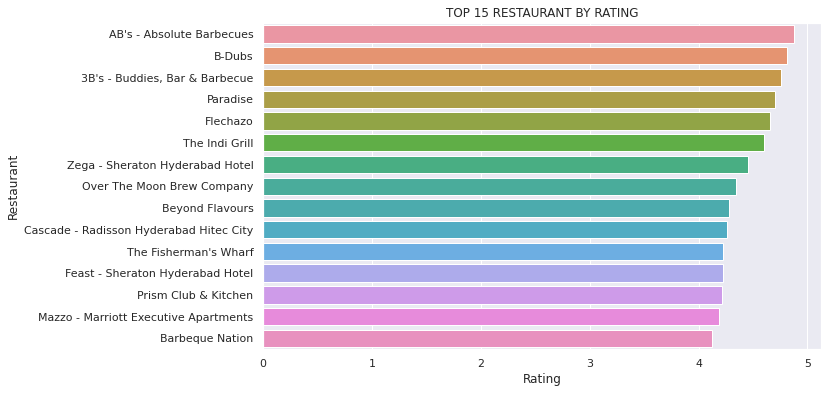

In [ ]:
sns.barplot(x = 'Rating',
            y = 'Restaurant',
            data = df_rating,
            order = df_rating.sort_values('Rating', ascending = False).Restaurant[:15])
plt.title('TOP 15 RESTAURANT BY RATING')
plt.show()

In [ ]:
df_reviwer = reviews_df.groupby(['Reviewer']).agg({'Reviews':'sum','Followers':'sum','Rating':'mean'}).reset_index()

In [ ]:
df_reviwer.describe()

,Reviews,Followers,Rating
count,7442.000000,7442.000000,7442.000000
mean,32.111664,218.183284,3.578302
std,114.700948,1222.190701,1.502574
min,0.000000,0.000000,1.000000
25%,1.000000,1.000000,2.500000
50%,3.000000,4.000000,4.000000
75%,14.000000,45.000000,5.000000
max,3093.000000,40230.000000,5.000000


In [ ]:
most_famous_reviewer = df_reviwer[(df_reviwer['Followers']> 10000) & (df_reviwer['Reviews']> 100) & (df_reviwer['Rating']> 3.5)]
most_famous_reviewer

,Reviewer,Reviews,Followers,Rating
56,Aanchal Khemka,945.0,11605.0,3.600000
903,Asad Rana,1086.0,12306.0,3.666667
1019,Avin Seth,1576.0,11064.0,4.500000
1285,Buddiga Sindhuri,300.0,10033.0,4.200000
1768,Food Nawabs,520.0,22129.0,4.000000
1786,Foodies Hyderabad,124.0,37976.0,4.500000
2173,Hungry Eyes,208.0,10258.0,5.000000
2816,Kunal Khanra,756.0,11440.0,4.750000
3480,Namit Agarwal,1253.0,13139.0,3.857143
4496,Rajat Goel ✳️,444.0,10149.0,4.000000


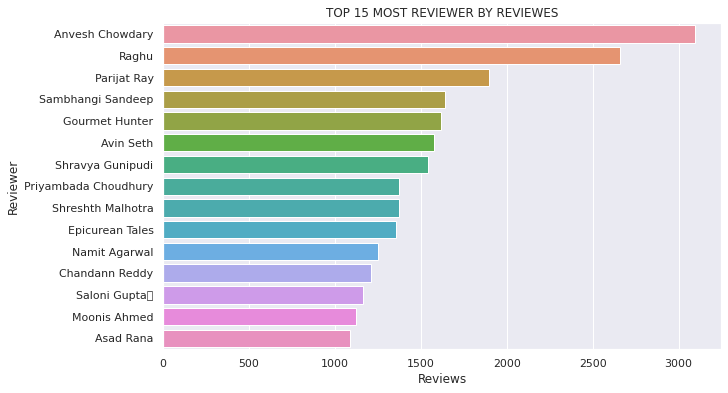

In [ ]:
sns.barplot(x = 'Reviews',
            y = 'Reviewer',
            data = df_reviwer,
            order = df_reviwer.sort_values('Reviews', ascending = False).Reviewer[:15])
plt.title('TOP 15 MOST REVIEWER BY REVIEWES')
plt.show()

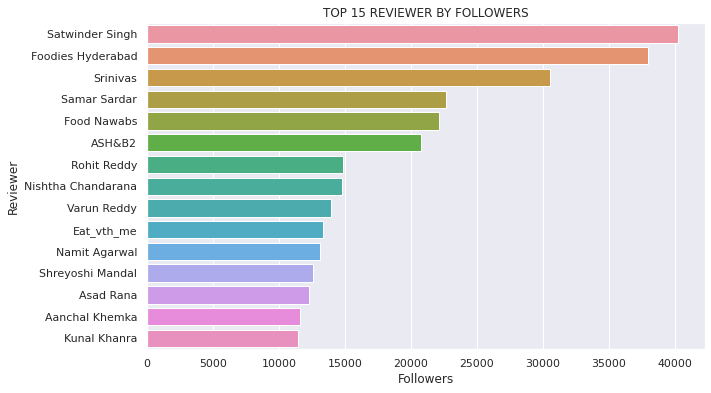

In [ ]:
sns.barplot(x = 'Followers',
            y = 'Reviewer',
            data = df_reviwer,
            order = df_reviwer.sort_values('Followers',ascending = False).Reviewer[:15])
plt.title('TOP 15 REVIEWER BY FOLLOWERS')
plt.show()

In [ ]:
most_famous_reviewer.head(5)

,Reviewer,Reviews,Followers,Rating
56,Aanchal Khemka,945.0,11605.0,3.600000
903,Asad Rana,1086.0,12306.0,3.666667
1019,Avin Seth,1576.0,11064.0,4.500000
1285,Buddiga Sindhuri,300.0,10033.0,4.200000
1768,Food Nawabs,520.0,22129.0,4.000000


In [ ]:
df_reviwer.head()

,Reviewer,Reviews,Followers,Rating
0,#FOODPORN,35.0,5873.0,5.0
1,#chloesviews // CAH,3.0,1.0,5.0
2,$ign,50.0,55.0,4.0
3,4mybanti,7.0,4.0,2.0
4,@FuloriBinaChutneyKaiseBani,86.0,244.0,5.0


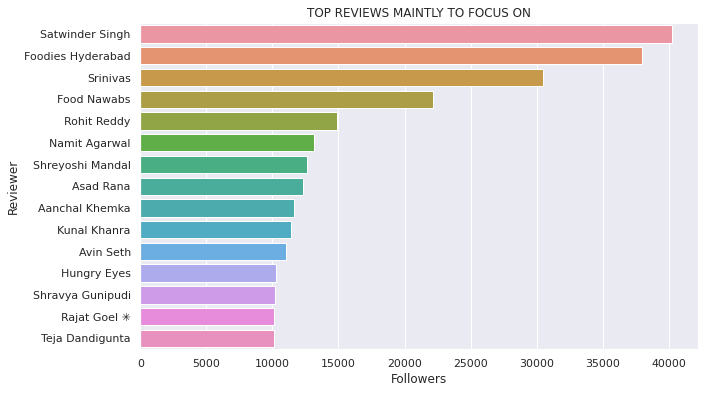

In [ ]:
sns.barplot(x = 'Followers',
            y = 'Reviewer',
            data = most_famous_reviewer,
            order = most_famous_reviewer.sort_values('Followers', ascending = False).Reviewer[:15])
plt.title('TOP REVIEWS MAINTLY TO FOCUS ON')
plt.show()

these are the reviewer a restaurant should focus on who have reviewed more than 100 restaurants and have followers greater than 10000 with an average rating above 3.5

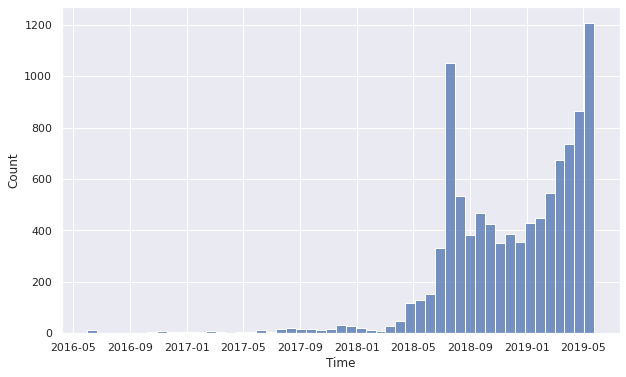

In [ ]:
sns.histplot(reviews_df.Time)

Looks like most of people started reviewing after May 2018.

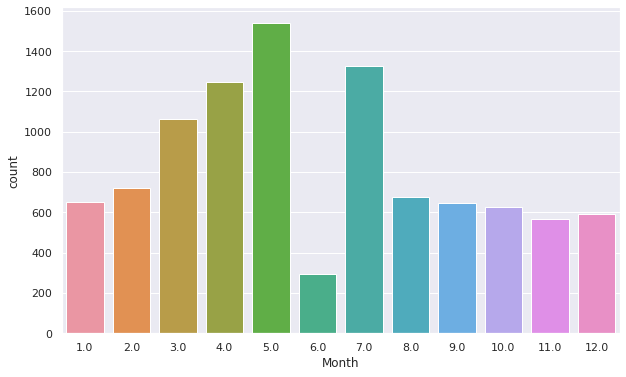

In [ ]:
sns.countplot(reviews_df.Month)

Seems like most of reviewer reviewed in month of March to July.

In [ ]:
meta_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

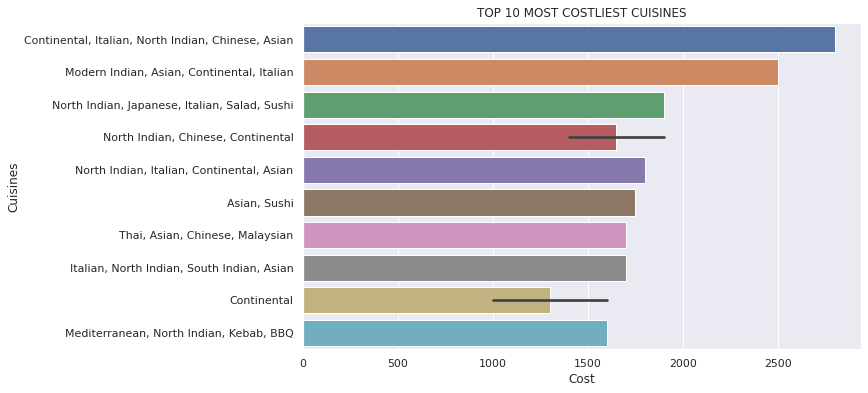

In [ ]:
sns.barplot(x = 'Cost',
            y = 'Cuisines',
            data = meta_df,
            order = meta_df.sort_values('Cost',ascending = False).Cuisines[:10])
plt.title('TOP 10 MOST COSTLIEST CUISINES')
plt.show()

# TEXT PREPROSSESING.

In [ ]:
# Storing text data into variable.
reviews = reviews_df.Review
reviews

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9995    Madhumathi Mahajan Well to start with nice cou...
9996    This place has never disappointed us.. The foo...
9997    Bad rating is mainly because of "Chicken Bone ...
9998    I personally love and prefer Chinese Food. Had...
9999    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# functions for text preprocessing 
def lower_case(text):
  '''convert the string in lower case 
  '''
  text=[x.lower() for x in text]
  return text

import string
def remove_punctuation (text):
  '''remove punctuation from the the list of strings
  '''
  text = [''.join(c for c in s if c not in string.punctuation) for s in text]
  return text

import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list 
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

def remove_all_extra_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text
  
import string
ascii_chars = set(string.printable)  # speeds things up
def remove_non_ascii_prinatble_from_list(list_of_words):
  '''removes non ascii charaters from text
  '''
  return [word for word in list_of_words 
            if all(char in ascii_chars for char in word)]

import contractions
def remove_contrations(text):
  '''shotents the words form 
  '''
  for index,x in enumerate(text):
    text[index] = contractions.fix(x)
  return text

def lemmatization_(text):
  '''converting to root words
  '''
  for index,x in enumerate(text):
    doc = nlp(x)  
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)

  return text
  

def Change_text(msg):
  '''Removing StopWord
  '''
  main_text=[word for word in no_punc.split() if word.lower() not in stop_list]
  return ' '.join(main_text)

def remove_stop_words (text):
  test_2=[]
  for x in reviews:
    test_1=[]
    for i in x.split(' '):
      if i not in stop_word_lsit:
        test_1.append(i)
    test_2.append(' '.join(test_1))
  return test_2


In [ ]:
# download spacy model.
! python -m spacy download en_core_web_sm

2022-12-03 05:20:41.932525: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 126 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
# print the set of spacy default stopword and addinf common words of the dataset.
print(nlp.Defaults.stop_words)
print(nlp.vocab['-PRON-'].is_stop)

{'rather', 'that', 'does', 'hundred', 'six', 'seems', 'nobody', 'becomes', 'almost', 'sixty', 'beyond', 'ca', 'anyway', 'or', 'among', 'already', 'just', 'beforehand', 'me', 'nor', 'except', 'some', 'she', 'full', 'between', 'myself', 'doing', 'call', 'front', 'eleven', 'their', "'ve", 'whereas', 'whither', 'back', 'own', 'whenever', 'within', 'done', 'nowhere', 'over', 'everywhere', 'once', 'behind', 'them', 'moreover', 'however', 'wherein', 'at', 'beside', 'whole', 'before', 'both', 'neither', 'have', 'we', 'if', 'even', "'s", 'us', '’m', 'how', 'by', 'off', 'sometime', 'fifteen', 'first', 'per', 'never', 'made', 'had', 'various', 'meanwhile', 'also', 'below', 'i', '’ve', 'above', 'each', 'name', 'being', 'hereby', 'very', 'seemed', '‘ll', 'this', 'together', 'thereupon', 'while', 'otherwise', '‘m', 'hers', 'might', 'became', 'few', 'go', 'namely', 'thus', 'to', 'used', '’ll', '’s', 'via', 'himself', 'therein', 'what', 'cannot', 'less', 'whereby', 'three', 'hereafter', 'well', 'into'

In [ ]:
# Add the word to the set of stopwords.
nlp.Defaults.stop_words.add('-PRON-')

# set the stop word tag on the lexeme.
nlp.vocab['-PRON-'].is_stop = True

# Add the word to the set of stop words, use the lower case.
nlp.Defaults.stop_words.add('pron')

# Set the stop word tag on lexeme.
nlp.vocab['-PRON'].is_stop = True

# Storing nlp stop words in a list.
stop_word_lsit = list(nlp.Defaults.stop_words)
stop_word_lsit

['rather',
 'that',
 'does',
 'hundred',
 'six',
 'seems',
 'nobody',
 'becomes',
 'almost',
 'sixty',
 'beyond',
 'ca',
 'anyway',
 'or',
 'among',
 'already',
 'just',
 'beforehand',
 'me',
 'nor',
 'except',
 'some',
 'she',
 'full',
 'between',
 'myself',
 'doing',
 'call',
 'front',
 'eleven',
 'their',
 "'ve",
 'whereas',
 'whither',
 'back',
 'own',
 'whenever',
 'within',
 'done',
 'nowhere',
 'over',
 'everywhere',
 'once',
 'behind',
 'them',
 'moreover',
 'however',
 'wherein',
 'at',
 'beside',
 'whole',
 'before',
 'both',
 'neither',
 'have',
 'we',
 'if',
 'even',
 "'s",
 'us',
 '’m',
 'how',
 'by',
 'off',
 'sometime',
 'fifteen',
 'first',
 'per',
 'never',
 'made',
 'had',
 'various',
 'meanwhile',
 'also',
 'below',
 'i',
 '’ve',
 'above',
 'each',
 'name',
 'being',
 'hereby',
 'very',
 'seemed',
 '‘ll',
 'this',
 'together',
 'thereupon',
 'while',
 'otherwise',
 '‘m',
 'hers',
 'might',
 'became',
 'few',
 'go',
 'namely',
 'thus',
 'to',
 'used',
 '’ll',
 '’s',
 

In [ ]:

# Convert the string into lower case, remove punctuation, non letters (number, emoji etc)
# extra spaces and non ascii character, lemmatization and removing stop words. 


reviews = lower_case(reviews)
reviews = remove_punctuation(reviews)
reviews = remove_non_leters(reviews)
reviews = remove_all_extra_spaces(reviews)
reviews = remove_non_ascii_prinatble_from_list(reviews)
reviews = remove_contrations(reviews)
reviews = lemmatization_(reviews)
reviews = remove_stop_words(reviews)

In [ ]:
all_words = ' '.join(reviews)
all_words

'ambience good food good saturday lunch cost effective good place sate brunch chill friend parent waiter souman das courteous helpful ambience good pleasant evening service prompt food good good experience souman das kudo service try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta music background amazing soumen das arun great guy behavior sincerety good food course I like visit place food goodwe order kodi drumstick basket mutton biryani good thank pradeep serve enjoy ambience good ambiance good service good food apradeecp subro good service food good papiya good hostess caption good star restaurant nice place ambience different food order tasty service gud worth visit reasonable visit place read review finally visit placeambience good come food crispy corn nice tawa fish ok basket biryani disappoint biryani ok flattering claim staff polite prompt especially pradeep suman excellent food specially like spicy food courteous staff shubro

In [ ]:
reviews

['ambience good food good saturday lunch cost effective good place sate brunch chill friend parent waiter souman das courteous helpful',
 'ambience good pleasant evening service prompt food good good experience souman das kudo service',
 'try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta music background amazing',
 'soumen das arun great guy behavior sincerety good food course I like visit place',
 'food goodwe order kodi drumstick basket mutton biryani good thank pradeep serve enjoy ambience good',
 'ambiance good service good food apradeecp subro good service food good papiya good hostess caption good star restaurant',
 'nice place ambience different food order tasty service gud worth visit reasonable visit place',
 'read review finally visit placeambience good come food crispy corn nice tawa fish ok basket biryani disappoint biryani ok flattering claim staff polite prompt especially pradeep suman',
 'excellent food specially like 

In [ ]:
# Storing the reviews in a feature of df.
reviews_df['Reviews'] = reviews
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,ambience good food good saturday lunch cost ef...,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,ambience good pleasant evening service prompt ...,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,try great food great ambience thnx service pra...,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,soumen das arun great guy behavior sincerety g...,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,food goodwe order kodi drumstick basket mutton...,2.0,2019.0,5.0,21.0


In [ ]:
# Function to remove words which are more than 45 and less than 2.
def len_of_words(reviews):
  reviews = ' '.join(i for i in reviews.split() if len(i) > 2)
  reviews = ' '.join(i for i in reviews.split() if len(i) <= 45)
  return reviews



In [ ]:
# Removing words greater than 45 and less than 2.
reviews_df['Reviews'] = reviews_df.Reviews.apply(lambda x: len_of_words(x))

In [ ]:
reviews_df

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,ambience good food good saturday lunch cost ef...,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,ambience good pleasant evening service prompt ...,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,try great food great ambience thnx service pra...,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,soumen das arun great guy behavior sincerety g...,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,food goodwe order kodi drumstick basket mutton...,2.0,2019.0,5.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,2016-06-05 00:08:00,0.0,madhumathi mahajan start nice courteous server...,54.0,2016.0,6.0,0.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,2016-06-04 22:01:00,0.0,place disappoint food courteous staff serene a...,53.0,2016.0,6.0,22.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,2016-06-03 10:37:00,3.0,bad rating mainly chicken bone find veg food a...,423.0,2016.0,6.0,10.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,2016-05-31 17:22:00,0.0,personally love prefer chinese food couple tim...,144.0,2016.0,5.0,17.0


In [ ]:
# Dropping review column.
reviews_df = reviews_df.drop('Review', axis = 1)
reviews_df

,Restaurant,Reviewer,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,5.0,2019-05-25 15:54:00,0.0,ambience good food good saturday lunch cost ef...,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,5.0,2019-05-25 14:20:00,0.0,ambience good pleasant evening service prompt ...,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,5.0,2019-05-24 22:54:00,0.0,try great food great ambience thnx service pra...,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,5.0,2019-05-24 22:11:00,0.0,soumen das arun great guy behavior sincerety g...,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,5.0,2019-05-24 21:37:00,0.0,food goodwe order kodi drumstick basket mutton...,2.0,2019.0,5.0,21.0
...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,3.0,2016-06-05 00:08:00,0.0,madhumathi mahajan start nice courteous server...,54.0,2016.0,6.0,0.0
9996,Chinese Pavilion,Sharad Agrawal,4.5,2016-06-04 22:01:00,0.0,place disappoint food courteous staff serene a...,53.0,2016.0,6.0,22.0
9997,Chinese Pavilion,Ramandeep,1.5,2016-06-03 10:37:00,3.0,bad rating mainly chicken bone find veg food a...,423.0,2016.0,6.0,10.0
9998,Chinese Pavilion,Nayana Shanbhag,4.0,2016-05-31 17:22:00,0.0,personally love prefer chinese food couple tim...,144.0,2016.0,5.0,17.0


# Performing cluster.


In [ ]:
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
# Converting cuisines to lower case.
meta_df['Cuisines'] = meta_df.Cuisines.apply(lambda x : x.lower())
cuisines_df = meta_df.loc[:,['Name','Cost','Cuisines']]
cuisines_df

,Name,Cost,Cuisines
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i..."
1,Paradise,800,"biryani, north indian, chinese"
2,Flechazo,1300,"asian, mediterranean, north indian, desserts"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever..."
4,Over The Moon Brew Company,1200,"asian, continental, north indian, chinese, med..."
...,...,...,...
100,IndiBlaze,600,"fast food, salad"
101,Sweet Basket,200,"bakery, mithai"
102,Angaara Counts 3,500,"north indian, biryani, chinese"
103,Wich Please,250,fast food


In [ ]:
# Splitting the cuisines and storing it into a list.
def cuisines_list(cuisines):
  all_cuisines = list(set(cuisines.split(',')))
  return all_cuisines

cuisines_df['cuisine'] = cuisines_df.Cuisines.apply(lambda x : cuisines_list(x))
cuisines_df.head()

,Name,Cost,Cuisines,cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...","[ north indian, european, kebab, continenta..."
1,Paradise,800,"biryani, north indian, chinese","[biryani, north indian, chinese]"
2,Flechazo,1300,"asian, mediterranean, north indian, desserts","[ desserts, asian, north indian, mediterranean]"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever...","[biryani, north indian, chinese, seafood, ..."
4,Over The Moon Brew Company,1200,"asian, continental, north indian, chinese, med...","[ north indian, chinese, asian, continental,..."


In [ ]:
# Transforming each element of list like to a row.
cuisines_df = cuisines_df.explode('cuisine')
cuisines_df

,Name,Cost,Cuisines,cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",north indian
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",european
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",kebab
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",continental
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",south indian
...,...,...,...,...
103,Wich Please,250,fast food,fast food
104,Republic Of Noodles - Lemon Tree Hotel,1700,"thai, asian, chinese, malaysian",asian
104,Republic Of Noodles - Lemon Tree Hotel,1700,"thai, asian, chinese, malaysian",malaysian
104,Republic Of Noodles - Lemon Tree Hotel,1700,"thai, asian, chinese, malaysian",thai


In [ ]:
# Checking unique values of cuisines.

set(cuisines_df.cuisine)

{' american',
 ' andhra',
 ' arabian',
 ' asian',
 ' bakery',
 ' bbq',
 ' beverages',
 ' biryani',
 ' burger',
 ' cafe',
 ' chinese',
 ' continental',
 ' desserts',
 ' european',
 ' fast food',
 ' finger food',
 ' goan',
 ' hyderabadi',
 ' indonesian',
 ' italian',
 ' japanese',
 ' juices',
 ' kebab',
 ' malaysian',
 ' mediterranean',
 ' mithai',
 ' modern indian',
 ' momos',
 ' mughlai',
 ' north indian',
 ' pizza',
 ' salad',
 ' seafood',
 ' south indian',
 ' spanish',
 ' sushi',
 ' thai',
 ' wraps',
 'american',
 'andhra',
 'arabian',
 'asian',
 'bakery',
 'bbq',
 'biryani',
 'burger',
 'cafe',
 'chinese',
 'continental',
 'desserts',
 'european',
 'fast food',
 'finger food',
 'healthy food',
 'hyderabadi',
 'ice cream',
 'italian',
 'kebab',
 'lebanese',
 'mediterranean',
 'mexican',
 'modern indian',
 'momos',
 'mughlai',
 'north eastern',
 'north indian',
 'seafood',
 'south indian',
 'street food',
 'thai'}

In [ ]:
cuisines_df['cuisine']

0       north indian
0           european
0              kebab
0        continental
0       south indian
           ...      
103        fast food
104            asian
104        malaysian
104             thai
104          chinese
Name: cuisine, Length: 313, dtype: object

Brinning all the cuisines into their respective spicy food, healthy food, fast food, dessert.

In [ ]:
# Brinning all the cuisines into their respective spicy food, healthy food, fast food, dessert.
l =[]
for i in cuisines_df['cuisine']:   
  if (i=='hyderabadi')| (i=='asian')|(i=='kebab')|(i=='north indian')|(i=='modern indian')|(i=='continental')|(i=='bbq')|(i=='biryani')|(i=='indonesian')|(i=='mughlai')|(i=='malaysian'):
    l.append('spicy food')
  if (i=='andhra')|(i=='north eastern')|(i=='lebanese')|(i=='salad')|(i=='south indian')|(i=='italian')|(i=='european')|(i=='mediterranean')|(i=='american')|(i=='thai')|(i=='arabian')|(i=='seafood')|(i=='mexican')|(i=='healthy food')|(i=='goan')|(i=='spanish'):
    l.append('Healthy food')
  if (i=='momos')|(i=='street food')|(i=='cafe')|(i=='chinese')|(i=='japanese')|(i=='pizza')|(i=='wraps')|(i=='burger')|(i=='fast food')|(i=='finger food')|(i=='sushi'):
    l.append('fast food')
  if (i=='bakery')|(i=='beverages')|(i=='desserts')|(i=='juices')|(i=='ice cream')|(i=='mithai'):
    l.append('Dessert')

# Updating the dataframe with cuisines surprest.
surprset_cuisine = pd.DataFrame(l)
surprset_cuisine.columns=['cuisine']
surprset_cuisine

,cuisine
0,fast food
1,spicy food
2,spicy food
3,spicy food
4,spicy food
...,...
100,fast food
101,Dessert
102,spicy food
103,fast food


In [ ]:
surprset_cuisine.value_counts()

cuisine     
spicy food      51
fast food       23
Healthy food    21
Dessert         10
dtype: int64